In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from numpy import asarray

In [ ]:
from PIL import Image
from numpy import asarray
# re-size all the images to this
IMAGE_SIZE = (400, 400)
path="/content/drive/MyDrive/Hackathon/AquaDataset/FWFD/"
data=[]
c=0
for folder in os.listdir(path):
    sub_path=path+"/"+folder
    count = 0
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img        
        image = Image.open(image_path)
        new_image = image.resize((400, 400))
        new_image = new_image.convert('RGB')
        new_image.save('/content/drive/MyDrive/Hackathon/AquaDataset/Resized/image_%3s_%3d.jpg' % (folder,count))
        saved_img = Image.open('/content/drive/MyDrive/Hackathon/AquaDataset/Resized/image_%3s_%3d.jpg' % (folder,count))
        res_img = asarray(saved_img)
        data.append(res_img)
        count += 1
        print(image.size) # Output: (1920, 1280)
        print(new_image.size) # Output: (400, 400)
        print(count)
        print("Number of images skipped= ",c)
        

FileNotFoundError: ignored

In [ ]:
x = np.array(data)
x = x/255.0
path = '/content/drive/MyDrive/Hackathon/AquaDataset/Classes'
datagen = ImageDataGenerator(rescale = 1./255)
dataset = datagen.flow_from_directory(path,
                                      target_size = IMAGE_SIZE,
                                      batch_size = 32,
                                      class_mode = 'sparse')
dataset.class_indices
y=dataset.classes
print(y)
print(len(data))

Found 133 images belonging to 2 classes.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
133


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(95, 400, 400, 3) (95,)
(24, 400, 400, 3) (24,)
(14, 400, 400, 3) (14,)


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

model=Sequential()

#covolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(400,400,3)))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#covolution layer
model.add(Conv2D(32,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#covolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#covolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#i/p layer
model.add(Flatten())

#o/p layer
model.add(Dense(2,activation='softmax'))

model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 199, 199, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 199, 199, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 197, 197, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 98, 98, 32)       0         
 g2D)                                                            
                                                      

In [ ]:
#compile model:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)


#Early stopping to avoid overfitting of model
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=30, callbacks=[early_stop], shuffle=True)


Epoch 1/30
3/3 [==============================] - 2s 407ms/step - loss: 0.2386 - accuracy: 0.9684 - val_loss: 0.8147 - val_accuracy: 0.7500
Epoch 2/30
3/3 [==============================] - 1s 270ms/step - loss: 0.2999 - accuracy: 0.9474 - val_loss: 0.6472 - val_accuracy: 0.7083
Epoch 3/30
3/3 [==============================] - 1s 278ms/step - loss: 0.3427 - accuracy: 0.9684 - val_loss: 0.5354 - val_accuracy: 0.6250
Epoch 4/30
3/3 [==============================] - 1s 277ms/step - loss: 0.1632 - accuracy: 0.9895 - val_loss: 1.2679 - val_accuracy: 0.3333
Epoch 5/30
3/3 [==============================] - 1s 340ms/step - loss: 0.1174 - accuracy: 0.9895 - val_loss: 1.2879 - val_accuracy: 0.2917
Epoch 6/30
3/3 [==============================] - 1s 294ms/step - loss: 0.0735 - accuracy: 0.9895 - val_loss: 0.5313 - val_accuracy: 0.7500
Epoch 7/30
3/3 [==============================] - 1s 276ms/step - loss: 0.1435 - accuracy: 0.9895 - val_loss: 0.7151 - val_accuracy: 0.7500
Epoch 8/30
3/3 [====

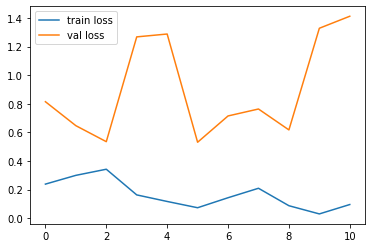

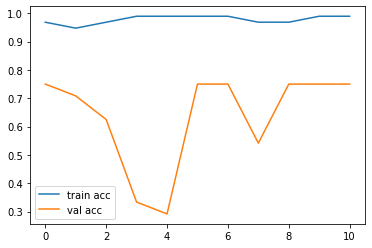

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)#loss graph
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()

plt.savefig('loss-graph.png')
plt.show()

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()


plt.savefig('acc-graph.png')
plt.show()



In [ ]:
model.save('/content/drive/MyDrive/Hackathon/AquaDataset/model.h5')

In [ ]:
y_val_pred=model.predict(x_val)
y_val_pred=np.argmax(y_val_pred,axis=1)
print(classification_report(y_val_pred,y_val))
confusion_matrix(y_val_pred,y_val)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.75      0.86        24

    accuracy                           0.75        24
   macro avg       0.50      0.38      0.43        24
weighted avg       1.00      0.75      0.86        24



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 0,  0],
       [ 6, 18]])

In [ ]:
model_path='/content/drive/MyDrive/Hackathon/AquaDataset/model.h5'

In [21]:
from keras.models import load_model
from PIL import Image
from numpy import asarray
import numpy

input = Image.open('/content/drive/MyDrive/Hackathon/AquaDataset/unhealthy.jpg')
input = input.resize((400, 400))
input = input.convert('RGB')
sample = asarray(input)
sample = numpy.expand_dims(sample, axis=0)

model = load_model(model_path)
answer = model.predict(sample)

ans = np.argmax( answer,axis=1)
if(ans==0):
  print('Healthy')
elif(ans==1):
  print('Unhealthy')

Healthy
